In [110]:
import pandas as pd
import numpy as np

# Joining data

## Data preparation for "cell_phones_total.csv"

In [9]:
# Read in df_cellphone
df_cellphone = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/cell_phones_total.csv")
print(df_cellphone.info()) 
print(df_cellphone.head())
df_cellphone.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   iso-3   214 non-null    object 
 1   1960    200 non-null    float64
 2   1965    200 non-null    float64
 3   1966    0 non-null      float64
 4   1967    0 non-null      float64
 5   1968    0 non-null      float64
 6   1969    0 non-null      float64
 7   1970    200 non-null    float64
 8   1971    0 non-null      float64
 9   1972    0 non-null      float64
 10  1973    0 non-null      float64
 11  1974    0 non-null      float64
 12  1975    200 non-null    float64
 13  1976    200 non-null    float64
 14  1977    200 non-null    float64
 15  1978    200 non-null    float64
 16  1979    200 non-null    float64
 17  1980    200 non-null    object 
 18  1981    199 non-null    object 
 19  1982    199 non-null    object 
 20  1983    198 non-null    object 
 21  1984    196 non-null    object 
 22  19

iso-3      0
1960      14
1965      14
1966     214
1967     214
1968     214
1969     214
1970      14
1971     214
1972     214
1973     214
1974     214
1975      14
1976      14
1977      14
1978      14
1979      14
1980      14
1981      15
1982      15
1983      16
1984      18
1985      19
1986      18
1987      20
1988      19
1989      21
1990       7
1991      18
1992      16
1993      16
1994      16
1995      14
1996      13
1997      14
1998      12
1999      11
2000      10
2001      10
2002       8
2003       8
2004       7
2005      10
2006      13
2007      10
2008      12
2009      10
2010       7
2011      11
2012       7
2013      10
2014       9
2015       7
2016      12
2017      10
2018      32
2019      71
dtype: int64

In [18]:
df_cellphone["1967"].unique()

array([nan])

In [20]:
df_cellphone["2018"].unique()

array([nan, '22M', '13.3M', '2.71M', '82.6k', '20.1M', '58.6M', '3.58M',
       '27.6M', '11M', '10.3M', '6.32M', '11.4M', '9.46M', '19.3M',
       '162M', '8.39M', '2.09M', '389k', '3.46M', '11.6M', '246k', '207M',
       '329k', '566k', '704k', '3.38M', '1.28M', '33.2M', '10.8M',
       '25.2M', '1.65B', '33.8M', '18.5M', '36.5M', '5M', '64.5M', '499k',
       '610k', '8.5M', '5.37M', '186k', '1.2M', '12.7M', '108M', '395k',
       '75.8k', '7.22M', '8.94M', '47.2M', '15.8M', '93.8M', '54.2M',
       '1.92M', '7.15M', '70.4M', '56.8k', '2.93M', '79.5M', '5.46M',
       '40.9M', '41k', '12M', '3.18M', '1.48M', '591k', '12.2M', '116k',
       '62.5k', '20.5M', '19.9M', '7.59M', '4.39M', '6.4M', '10M', '319M',
       '1.18B', '4.97M', '88.7M', '411k', '10.7M', '83.3M', '2.96M',
       '8.73M', '180M', '26.1M', '49.5M', '8.74M', '19.4M', '53.3k',
       '66.4M', '7.1M', '3.66M', '4.42M', '185k', '47.3k', '30.3M',
       '4.59M', '799k', '2.07M', '2.18M', '44.7M', '32.7k', '3.64M',
      

### In the dataset, converting blank spaces to 0 is a reasonable solution since all values are numerical.
### For the remaining values, according to common human conventions, "M" stands for 1 000 000, "k" stands for 1 000, and so on.

In [11]:
def convert_to_number(s): 
    if pd.isna(s): 
        return 0 
    if isinstance(s, (int, float)): 
            return s # If it is already a number, return it directly
    multiplier = 1 
    if 'k' in s: 
        multiplier = 1_000 
    elif 'M' in s: 
        multiplier = 1_000_000 
    elif 'B' in s: 
        multiplier = 1_000_000_000 
    return float(s.rstrip('kMB')) * multiplier 
    
print("Original data preview:") 
print(df_cellphone.head()) 
 
for column in df_cellphone.columns[1:]: 
    df_cellphone[column] = df_cellphone[column].apply(convert_to_number) 

print("\nData after conversion:") 
print(df_cellphone.info()) 
print(df_cellphone.head())

Original data preview:
  iso-3  1960  1965  1966  1967  1968  1969  1970  1971  1972  ...   2010  \
0   ABW   0.0   0.0   NaN   NaN   NaN   NaN   0.0   NaN   NaN  ...   132k   
1   AFG   0.0   0.0   NaN   NaN   NaN   NaN   0.0   NaN   NaN  ...  10.2M   
2   AGO   0.0   0.0   NaN   NaN   NaN   NaN   0.0   NaN   NaN  ...   9.4M   
3   ALB   0.0   0.0   NaN   NaN   NaN   NaN   0.0   NaN   NaN  ...  2.69M   
4   AND   0.0   0.0   NaN   NaN   NaN   NaN   0.0   NaN   NaN  ...  65.5k   

    2011   2012   2013   2014   2015   2016   2017   2018   2019  
0    NaN   135k   139k   140k   141k    NaN    NaN    NaN    NaN  
1  13.8M  15.3M  16.8M  18.4M  19.7M  21.6M  23.9M    22M  22.6M  
2  12.1M  12.8M  13.3M  14.1M  13.9M    13M  13.3M  13.3M  14.8M  
3   3.1M   3.5M  3.69M  3.36M   3.4M  3.37M  3.63M  2.71M  2.63M  
4    65k  63.9k  63.9k  66.2k  71.3k  76.1k  80.3k  82.6k  87.9k  

[5 rows x 57 columns]

Data after conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 

### Now we kan express the numerical values in scientific notation.

In [13]:
# Convert numerical values to scientific notation format while preserving original precision 
def format_scientific_notation(x): 
    if isinstance(x, (int, float)) and not pd.isna(x): 
        return '{:g}'.format(x) 
    return x 
    
df_cellphone = df_cellphone.applymap(format_scientific_notation) 
# Print the transformed dataframe information 
print(df_cellphone.info()) 
print(df_cellphone.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   iso-3   214 non-null    object
 1   1960    214 non-null    object
 2   1965    214 non-null    object
 3   1966    214 non-null    object
 4   1967    214 non-null    object
 5   1968    214 non-null    object
 6   1969    214 non-null    object
 7   1970    214 non-null    object
 8   1971    214 non-null    object
 9   1972    214 non-null    object
 10  1973    214 non-null    object
 11  1974    214 non-null    object
 12  1975    214 non-null    object
 13  1976    214 non-null    object
 14  1977    214 non-null    object
 15  1978    214 non-null    object
 16  1979    214 non-null    object
 17  1980    214 non-null    object
 18  1981    214 non-null    object
 19  1982    214 non-null    object
 20  1983    214 non-null    object
 21  1984    214 non-null    object
 22  1985    214 non-null    ob

C:\Users\User-Dator\AppData\Local\Temp\ipykernel_24096\2403104231.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_cellphone = df_cellphone.applymap(format_scientific_notation)


## Data preparation for "pop_data.csv".

In [15]:
# Read in df_pop
df_pop = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/pop_data.csv")
print(df_pop.info()) 
print(df_pop.head())
df_pop.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 63 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  266 non-null    int64  
 1   iso-3       266 non-null    object 
 2   1960        264 non-null    float64
 3   1961        264 non-null    float64
 4   1962        264 non-null    float64
 5   1963        264 non-null    float64
 6   1964        264 non-null    float64
 7   1965        264 non-null    float64
 8   1966        264 non-null    float64
 9   1967        264 non-null    float64
 10  1968        264 non-null    float64
 11  1969        264 non-null    float64
 12  1970        264 non-null    float64
 13  1971        264 non-null    float64
 14  1972        264 non-null    float64
 15  1973        264 non-null    float64
 16  1974        264 non-null    float64
 17  1975        264 non-null    float64
 18  1976        264 non-null    float64
 19  1977        264 non-null    f

Unnamed: 0    0
iso-3         0
1960          2
1961          2
1962          2
             ..
2016          1
2017          1
2018          1
2019          1
2020          1
Length: 63, dtype: int64

In [41]:
df_pop["1961"].unique()

array([5.58110000e+04, 1.34169237e+08, 8.79014000e+06, 9.93140280e+07,
       5.44133300e+06, 1.65980000e+06, 1.02160000e+04, 9.57603480e+07,
       1.40984000e+05, 2.06806530e+07, 1.97153000e+06, 2.06260000e+04,
       5.62450000e+04, 1.04830000e+07, 7.08629900e+06, 4.04575000e+06,
       2.81597200e+06, 9.18394800e+06, 2.55121600e+06, 4.85283300e+06,
       5.18827690e+07, 7.94311800e+06, 1.66970000e+05, 1.20216000e+05,
       3.32533300e+06, 8.27121600e+06, 9.37570000e+04, 4.55000000e+04,
       3.78474400e+06, 7.53300080e+07, 2.33698000e+05, 8.95610000e+04,
       2.27071000e+05, 5.24403000e+05, 1.71036400e+06, 1.82710000e+07,
       9.22327380e+07, 5.43429400e+06, 1.10225000e+05, 8.31353500e+06,
       6.60330000e+08, 3.84833600e+06, 5.20035500e+06, 1.56732840e+07,
       1.08343100e+06, 1.61824140e+07, 1.98617000e+05, 2.14788000e+05,
       1.39613800e+06, 4.28942900e+06, 7.41851800e+06, 1.26125000e+05,
       8.62600000e+03, 5.94771000e+05, 9.58665100e+06, 7.33776320e+07,
      

### &nbsp;&nbsp;&nbsp;&nbsp; Because the average number of calls is equal to the total number of calls divided by the number of people, the 'number of people' will appear in the denominator, so you cannot replace the default value with zero. In normal calculations, since the total number of calls and the number of people are both positive, the average number of calls obtained should also be positive. In this way, if I replace the default value of 'number of people' with -1, when a negative number appears, it means that the 'number of people' in the original data was actually missing.

In [17]:
# Replace NaN or blank values with -1 
df_pop.fillna(-1, inplace=True)
df_pop

,Unnamed: 0,iso-3,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,0,ABW,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,59291.0,59522.0,...,101288.0,102112.0,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0
1,1,AFE,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,153955516.0,158313235.0,...,537792950.0,552530654.0,567892149.0,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0
2,2,AFG,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,9783147.0,10010030.0,...,29249157.0,30466479.0,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0
3,3,AFW,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,110798486.0,113319950.0,...,366489204.0,376797999.0,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0
4,4,AGO,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,5787044.0,5827503.0,...,24259111.0,25188292.0,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,261,XKX,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,...,1791000.0,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0
262,262,YEM,5542459.0,5646668.0,5753386.0,5860197.0,5973803.0,6097298.0,6228430.0,6368014.0,...,25475610.0,26223391.0,26984002.0,27753304.0,28516545.0,29274002.0,30034389.0,30790513.0,31546691.0,32284046.0
263,263,ZAF,16520441.0,16989464.0,17503133.0,18042215.0,18603097.0,19187194.0,19789771.0,20410677.0,...,52443325.0,53145033.0,53873616.0,54729551.0,55876504.0,56422274.0,56641209.0,57339635.0,58087055.0,58801927.0
264,264,ZMB,3119430.0,3219451.0,3323427.0,3431381.0,3542764.0,3658024.0,3777680.0,3901288.0,...,14265814.0,14744658.0,15234976.0,15737793.0,16248230.0,16767761.0,17298054.0,17835893.0,18380477.0,18927715.0


## Melt df_cellphone and df_pop for next steg joining

In [19]:
# melt df_cellphone
df_cellphone_melted = pd.melt(df_cellphone, id_vars=['iso-3'], var_name='year', value_name='n_cellphones')
print( df_cellphone_melted)

      iso-3  year n_cellphones
0       ABW  1960            0
1       AFG  1960            0
2       AGO  1960            0
3       ALB  1960            0
4       AND  1960            0
...     ...   ...          ...
11979   XKX  2019            0
11980   YEM  2019            0
11981   ZAF  2019      9.7e+07
11982   ZMB  2019     1.72e+07
11983   ZWE  2019     1.32e+07

[11984 rows x 3 columns]


In [21]:
# Drop the 'Unnamed: 0' column if it's not needed
# df_pop.drop(columns=['Unnamed: 0'], inplace=True)
# melt df_pop
df_pop_melted = pd.melt(df_pop, id_vars=['iso-3'], var_name='year', value_name='population')
df_pop_melted

,iso-3,year,population
0,ABW,Unnamed: 0,0.0
1,AFE,Unnamed: 0,1.0
2,AFG,Unnamed: 0,2.0
3,AFW,Unnamed: 0,3.0
4,AGO,Unnamed: 0,4.0
...,...,...,...
16487,XKX,2020,1790133.0
16488,YEM,2020,32284046.0
16489,ZAF,2020,58801927.0
16490,ZMB,2020,18927715.0


## Join three tables together

In [23]:
# Join population and name of the countries to cellphones
df_cellphone_pop_in_1 = df_cellphone_melted.merge(df_pop_melted, on=['iso-3', 'year'], how="inner")
df_cellphone_pop_in_1

,iso-3,year,n_cellphones,population
0,ABW,1960,0,54608.0
1,AFG,1960,0,8622466.0
2,AGO,1960,0,5357195.0
3,ALB,1960,0,1608800.0
4,AND,1960,0,9443.0
...,...,...,...,...
11979,XKX,2019,0,1788878.0
11980,YEM,2019,0,31546691.0
11981,ZAF,2019,9.7e+07,58087055.0
11982,ZMB,2019,1.72e+07,18380477.0


In [25]:
# Read in df_country
df_country = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/country_data.csv")
df_country_relevant = df_country[['name','alpha-3']]
df_country_relevant

,name,alpha-3
0,Afghanistan,AFG
1,Åland Islands,ALA
2,Albania,ALB
3,Algeria,DZA
4,American Samoa,ASM
...,...,...
244,Wallis and Futuna,WLF
245,Western Sahara,ESH
246,Yemen,YEM
247,Zambia,ZMB


In [27]:
# Join country to df_cellphone_pop_in_1 
df_total_3_in_1 = df_cellphone_pop_in_1.merge(df_country_relevant, left_on='iso-3', right_on='alpha-3', how='left')
df_total_3_in_1.drop(columns=['alpha-3'], inplace=True)
df_total_3_in_1

,iso-3,year,n_cellphones,population,name
0,ABW,1960,0,54608.0,Aruba
1,AFG,1960,0,8622466.0,Afghanistan
2,AGO,1960,0,5357195.0,Angola
3,ALB,1960,0,1608800.0,Albania
4,AND,1960,0,9443.0,Andorra
...,...,...,...,...,...
11979,XKX,2019,0,1788878.0,NaN
11980,YEM,2019,0,31546691.0,Yemen
11981,ZAF,2019,9.7e+07,58087055.0,South Africa
11982,ZMB,2019,1.72e+07,18380477.0,Zambia


### I noticed that some iso-3 codes do not have corresponding country names, so I use the iso-3 code as the country name.

In [29]:
df_total_3_in_1['name'] = df_total_3_in_1.apply(lambda row: row['iso-3'] if pd.isna(row['name']) else row['name'], axis=1)
df_total_3_in_1

,iso-3,year,n_cellphones,population,name
0,ABW,1960,0,54608.0,Aruba
1,AFG,1960,0,8622466.0,Afghanistan
2,AGO,1960,0,5357195.0,Angola
3,ALB,1960,0,1608800.0,Albania
4,AND,1960,0,9443.0,Andorra
...,...,...,...,...,...
11979,XKX,2019,0,1788878.0,XKX
11980,YEM,2019,0,31546691.0,Yemen
11981,ZAF,2019,9.7e+07,58087055.0,South Africa
11982,ZMB,2019,1.72e+07,18380477.0,Zambia


In [36]:
# Columns in the new order
df_total_3_in_1 = df_total_3_in_1[['name', 'iso-3', 'year', 'n_cellphones', 'population']]
# Ensure 'n_cellphones' and 'population' are numeric 
df_total_3_in_1['n_cellphones'] = pd.to_numeric(df_total_3_in_1['n_cellphones'], errors='coerce') 
df_total_3_in_1['population'] = pd.to_numeric(df_total_3_in_1['population'], errors='coerce')
# Calculate the percentage 
df_total_3_in_1["phones per capita"] = (df_total_3_in_1['n_cellphones'] / df_total_3_in_1['population'])
df_total_3_in_1

,name,iso-3,year,n_cellphones,population,phones per capita
0,Aruba,ABW,1960,0.0,54608.0,0.000000
1,Afghanistan,AFG,1960,0.0,8622466.0,0.000000
2,Angola,AGO,1960,0.0,5357195.0,0.000000
3,Albania,ALB,1960,0.0,1608800.0,0.000000
4,Andorra,AND,1960,0.0,9443.0,0.000000
...,...,...,...,...,...,...
11979,XKX,XKX,2019,0.0,1788878.0,0.000000
11980,Yemen,YEM,2019,0.0,31546691.0,0.000000
11981,South Africa,ZAF,2019,97000000.0,58087055.0,1.669907
11982,Zambia,ZMB,2019,17200000.0,18380477.0,0.935775


## Pivot the table that contains years, countries and phones per capita

In [42]:
df_total_3_in_1_selected = df_total_3_in_1[['year', 'name', 'phones per capita']]
# Rename the 'name' column to 'country' 
df_total_3_in_1_selected.rename(columns={'name': 'country'}, inplace=True)
df_total_3_in_1_selected

C:\Users\User-Dator\AppData\Local\Temp\ipykernel_24096\2607676699.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_3_in_1_selected.rename(columns={'name': 'country'}, inplace=True)


,year,country,phones per capita
0,1960,Aruba,0.000000
1,1960,Afghanistan,0.000000
2,1960,Angola,0.000000
3,1960,Albania,0.000000
4,1960,Andorra,0.000000
...,...,...,...
11979,2019,XKX,0.000000
11980,2019,Yemen,0.000000
11981,2019,South Africa,1.669907
11982,2019,Zambia,0.935775


In [134]:
# This is the table which the teacher want me to get
df_result = df_total_3_in_1_selected.pivot(index='year', columns='country', values='phones per capita')
# Ensure 'year' is not an index 
if 'year' not in df_result.columns: 
    df_result.reset_index(inplace=True) 
# Convert 'year' column to integer 
df_result['year'] = df_result['year'].astype(int)
df_result

country,year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Virgin Islands (British),Virgin Islands (U.S.),XKX,Yemen,Zambia,Zimbabwe
0,1960,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1965,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1966,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1967,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1968,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,1969,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,1970,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,1971,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,1972,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,1973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Analyse the country with highest growth rate of cell phones (per capita) in the last 10 years.

In [153]:
# Select data from 2010 to 2019 
df_2010_to_2019 = df_result[(df_result['year'] >= 2010) & (df_result['year'] <= 2019)] 
# Display the result 
df_2010_to_2019

country,year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Virgin Islands (British),Virgin Islands (U.S.),XKX,Yemen,Zambia,Zimbabwe
46,2010,0.361835,0.923440,0.914761,0.0,0.915841,0.402325,1.960441,1.399906,1.313515,...,0.735232,0.692597,0.971617,1.281303,1.723763,0.0,0.316498,0.448595,0.395154,0.599699
47,2011,0.471808,1.067054,0.974180,0.0,0.921110,0.498782,2.029310,1.471105,1.095946,...,0.865730,0.545178,0.989821,1.437479,1.666547,0.0,0.000000,0.459263,0.571997,0.706291
48,2012,0.502191,1.206730,1.006426,0.0,0.899835,0.508173,1.448548,1.540737,1.139163,...,0.681791,0.567402,1.038329,1.478142,1.713522,0.0,0.000000,0.530061,0.712122,0.949844
49,2013,0.532637,1.274571,1.039457,0.0,0.895372,0.508663,1.288179,1.597045,1.154621,...,0.710904,0.481911,1.035591,1.373691,1.863419,0.0,0.000000,0.622591,0.682640,1.003289
50,2014,0.562412,1.162990,1.117126,0.0,0.924310,0.519752,1.344749,1.434280,1.197261,...,0.702263,0.577934,1.010159,1.490648,1.891547,0.0,0.000000,0.616143,0.641767,0.851632
51,2015,0.583643,1.180267,1.092477,0.0,0.993784,0.494174,1.956838,1.432812,1.201975,...,0.696510,0.633053,0.953170,1.301640,1.947831,0.0,0.000000,0.526010,0.713924,0.904278
52,2016,0.623625,1.171725,1.165116,0.0,1.049076,0.445897,1.987545,1.461332,1.196859,...,0.731602,0.773256,0.897810,1.299308,1.334947,0.0,0.000000,0.560224,0.715659,0.892567
53,2017,0.670531,1.263287,1.113365,0.0,1.087531,0.440272,2.019337,1.405387,1.223736,...,0.750264,0.785559,0.801612,1.276147,1.463739,0.0,0.000000,0.512746,0.774654,0.955861
54,2018,0.599671,0.945445,1.125766,0.0,1.101142,0.425280,0.000000,1.317017,1.262093,...,0.703967,0.844271,0.694033,1.485550,1.318609,0.0,0.000000,0.496906,0.869034,0.857018
55,2019,0.598366,0.921452,1.102906,0.0,1.151383,0.457445,0.000000,1.303998,1.283414,...,0.994629,0.870554,0.572973,1.419969,0.000000,0.0,0.000000,0.000000,0.935775,0.859677


In [151]:
from sklearn.linear_model import LinearRegression

In [172]:
# Prepare arrays to store results 
countries = df_2010_to_2019.columns 
slopes = [] 
# Perform linear regression for each country 
for country in countries: 
    X = np.array(df_2010_to_2019.index).reshape(-1, 1) # years as X 
    y = df_2010_to_2019[country].values.reshape(-1, 1) # values as y 
    model = LinearRegression() 
    model.fit(X, y) 
    slope = model.coef_[0][0] 
    slopes.append(slope) 
# Create a DataFrame for results 
df_slopes = pd.DataFrame({'Country': countries, 'Slope': slopes}) 
# Drop the row where Country is 'year' 
df_slopes = df_slopes[df_slopes['Country'] != 'year'] 
# Sort the DataFrame in decreasing order by 'Slope' 
df_slopes_sorted = df_slopes.sort_values(by='Slope', ascending=False)
# Display the updated DataFrame 
df_slopes_sorted.head(20)

,Country,Slope
45,Costa Rica,0.108050
201,United Arab Emirates,0.106699
190,Timor-Leste,0.096541
189,Thailand,0.090682
132,Myanmar,0.089677
51,Côte d'Ivoire,0.079329
85,Hong Kong,0.076634
80,Guinea,0.073321
171,Sierra Leone,0.071011
73,Ghana,0.069444


## Create a plot that illustrates the growth rate of the countries in the table above over the last 10 years.

In [165]:
import matplotlib.pyplot as plt 
import seaborn as sns 
# Set the aesthetic style of the plots 
sns.set(style="whitegrid")

C:\Users\User-Dator\AppData\Local\Temp\ipykernel_24096\1583991938.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x='Slope', y='Country', data=df_slopes_sorted.head(20), palette='viridis')


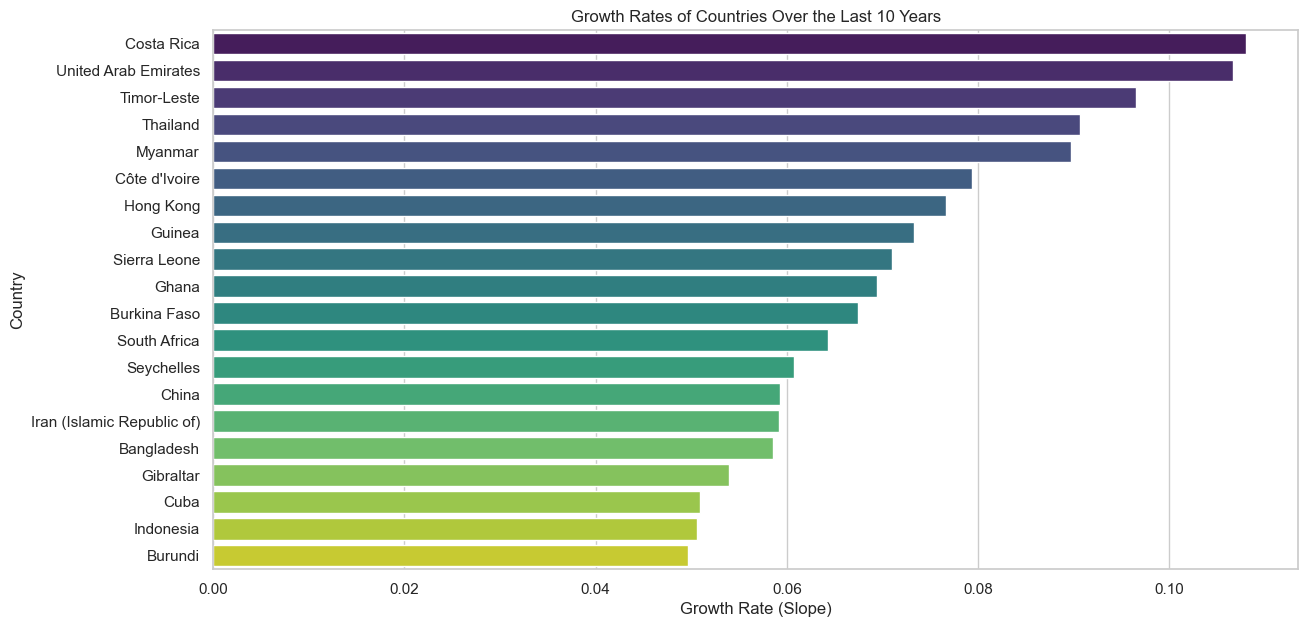

In [178]:
# Plotting the growth rates 
plt.figure(figsize=(14, 7)) 
plot = sns.barplot(x='Slope', y='Country', data=df_slopes_sorted.head(20), palette='viridis') 
# Adding titles and labels 
plt.title('Growth Rates of Countries Over the Last 10 Years') 
plt.xlabel('Growth Rate (Slope)') 
plt.ylabel('Country') 
# Display the plot 
plt.show()

# SQL

In [11]:
import pandas as pd
import sqlite3 as sql

## Querying SQL database

In [16]:
conn = sql.connect("./user_actions.db")
cursor = conn.cursor()

In [19]:
tables = list(cursor.execute("SELECT name FROM sqlite_master WHERE type='table';"))
tables

[('user_actions',)]

In [24]:
# SELECT
query = """
SELECT * 
FROM user_actions
"""
cursor.execute(query)
#for data in cursor.fetchall():
#    print(data)
df = pd.read_sql_query(query, conn)
df.head()

,user_id,username,email,action,timestamp
0,34,user34,user34@email.com,signup,2015-02-04 14:38:47
1,28,user28,user28@email.com,signup,2015-03-09 11:55:33
2,27,user27,user27@email.com,login,2015-04-17 14:48:31
3,27,user27,user27@email.com,login,2015-04-21 13:22:14
4,27,user27,user27@email.com,reset_password,2015-04-25 16:30:15


## Retrieve the usernames of all users who have performed the "signup" action.

In [29]:
# FILTER
query1 = """
SELECT * 
FROM user_actions
WHERE action == "signup"
"""
df_username_signup = pd.read_sql_query(query1, conn)['username']
df_username_signup

0     user34
1     user28
2      user1
3     user24
4     user15
5     user20
6     user18
7     user25
8      user3
9      user9
10    user27
11    user16
12    user17
13     user4
14     user8
15    user13
16    user19
17    user31
18    user10
19    user23
20    user11
21    user33
22    user12
23    user29
24    user21
25     user6
26    user14
27    user30
28     user7
29    user26
30    user22
31     user5
32    user35
33     user2
34    user32
Name: username, dtype: object

## Find the total number of log entries for each user. Display the user_id, username, and the count of log entries.

In [34]:
# FILTER
query2 = """
SELECT user_id, username, COUNT(*) AS log_entries
FROM user_actions
WHERE action = 'login'
GROUP BY user_id, username;
"""

pd.read_sql_query(query2, conn)

,user_id,username,log_entries
0,1,user1,97
1,2,user2,139
2,3,user3,101
3,4,user4,425
4,5,user5,182
5,6,user6,448
6,7,user7,358
7,8,user8,318
8,9,user9,109
9,10,user10,163


## Identify users who have both logged in (action = 'login') and signed up (action = 'signup') on the same day. Display the user_id and username.

In [39]:
# FILTER
query3 = """ 
SELECT DISTINCT ua1.user_id, ua1.username 
FROM user_actions ua1 
JOIN user_actions ua2 ON ua1.user_id = ua2.user_id 
    AND ua1.username = ua2.username 
    AND DATE(ua1.timestamp) = DATE(ua2.timestamp) 
WHERE ua1.action = 'login' AND ua2.action = 'signup' 
ORDER BY ua1.user_id; 
"""

pd.read_sql_query(query3, conn)

,user_id,username
0,2,user2
1,5,user5
2,7,user7
3,8,user8
4,12,user12
5,22,user22
6,30,user30
7,32,user32


# Regex

In [45]:
import re
import pandas as pd

## Read in data

In [50]:
# URL of the data 
url = "https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/comments.txt" 
# Read the data from the URL into a DataFrame 
df = pd.read_csv(url, header=None, names=['comment']) 
# Display the DataFrame 
print(df)

                                              comment
0                 1. "Great post! #programming #tips"
1           2. "Enjoyed the article. #coding #python"
2              3. "Interesting insights. #tech #data"
3          4. "This is awesome! #programming #coding"
4            5. "Thanks for sharing. #data #analysis"
..                                                ...
95  96. "Innovations in tech and AI. #tech #innova...
96  97. "Effective coding patterns. #programming #...
97  98. "Data visualization best practices. #data ...
98   99. "Optimizing Python code. #programming #tips"
99  100. "Coding challenges for skill development....

[100 rows x 1 columns]


## Write a regular expression to extract all hashtags from a given comment. For example, applying the regex to comment 1 should return ["#programming", "#tips"].

In [55]:
# Function to extract hashtags from a comment 
def extract_hashtags(comment): 
    return re.findall(r"#\w+", comment) 
# Apply the function to each comment 
df['hashtags'] = df['comment'].apply(extract_hashtags) 
# Display the DataFrame with extracted hashtags 
print(df)

                                              comment                 hashtags
0                 1. "Great post! #programming #tips"    [#programming, #tips]
1           2. "Enjoyed the article. #coding #python"       [#coding, #python]
2              3. "Interesting insights. #tech #data"           [#tech, #data]
3          4. "This is awesome! #programming #coding"  [#programming, #coding]
4            5. "Thanks for sharing. #data #analysis"       [#data, #analysis]
..                                                ...                      ...
95  96. "Innovations in tech and AI. #tech #innova...     [#tech, #innovation]
96  97. "Effective coding patterns. #programming #...  [#programming, #coding]
97  98. "Data visualization best practices. #data ...      [#data, #analytics]
98   99. "Optimizing Python code. #programming #tips"    [#programming, #tips]
99  100. "Coding challenges for skill development....       [#coding, #python]

[100 rows x 2 columns]


## Create a regular expression to find comments that mention both "#programming" and "#python". Apply the regex to comment 2 and check if it matches.

In [60]:
# Function to check if a comment contains both #programming and #python 
def contains_both_hashtags(comment): 
    pattern = r"(?=.*#programming)(?=.*#python)" 
    return bool(re.search(pattern, comment)) 
# Apply the function to each comment and filter 
df['contains_both'] = df['comment'].apply(contains_both_hashtags) 
#df['contains_both']
df_filtered = df[df['contains_both']] 
# Display the filtered DataFrame 
df_filtered

,comment,hashtags,contains_both
5,"6. ""I learned a lot. #programming #python #tips""","[#programming, #python, #tips]",True
14,"15. ""Well explained. #programming #python #tips""","[#programming, #python, #tips]",True
20,"21. ""Love the content! #programming #python #t...","[#programming, #python, #tips]",True
29,"30. ""Inspired by the tips. #programming #pytho...","[#programming, #python, #tips]",True


## Using your regular expression, extract all unique hashtags from the entire text file.

In [65]:
# Function to extract hashtags from a comment 
def extract_hashtags(comment): 
    return re.findall(r"#\w+", comment) 
# Apply the function to each comment to get a list of all hashtags 
all_hashtags = df['comment'].apply(extract_hashtags).explode().dropna().unique() 
# Display the unique hashtags 
all_hashtags

array(['#programming', '#tips', '#coding', '#python', '#tech', '#data',
       '#analysis', '#innovation', '#analytics', '#insights', '#research'],
      dtype=object)